In [4]:
import numpy as np
import matplotlib.pyplot as plt    
import pandas as pd
from scipy.special import expit
from scipy import optimize
%matplotlib inline

In [5]:
#loading dataset
data = np.loadtxt('ex2data1.txt', delimiter= ',')
y = np.array(data[:,-1])
y = y.reshape((-1,1))
X = np.array(data[:, 0:-1])
X = np.insert(X, 0, 1, axis = 1)
m = y.size

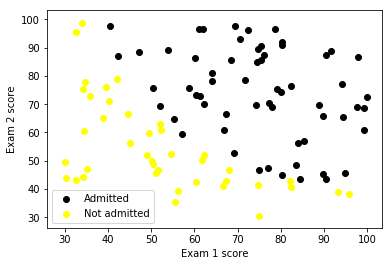

In [7]:
#Making scatterlot
passedData = data[:, 2] == 1
failedData = data[:, 2] == 0

axes = plt.gca()
axes.scatter(data[passedData][:, 0], data[passedData][:, 1], c = 'black', label = "Admitted")
axes.scatter(data[failedData][:, 0], data[failedData][:, 1], c = 'yellow', label = "Not admitted")
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(loc = 3)


In [8]:
#Implementation of hypothesis function
def hypFun(theta, X):
    return expit(np.dot(X, theta))  

In [9]:
#Implementation of Cost function
def costFun(theta, X, y):
    regPos = np.dot(-np.array(y).T, np.log(hypFun(theta,X)))
    regNeg = np.dot(1-np.array(y).T,np.log(1 - hypFun(theta,X)))
    Cost = float((1./y.shape[0]) * np.sum(regPos - regNeg))
    #grad = 1 / y.shape[0] * (hypFun(theta,X) - y).dot(X)
    return Cost

In [10]:
#Testing cost function - should be about 0.69
initial_theta = np.zeros((X.shape[1],1))
costFun(initial_theta, X, y)

0.6931471805599453

In [11]:
#Optimazing cost function
def optimizeTheta(mytheta,X,y):
    result = optimize.fmin(costFun, x0=mytheta, args=(X, y), maxiter=400, full_output=True)
    return result

In [13]:
#optimization result - Cost should be ~0.203
result = optimizeTheta(initial_theta,X,y)
print(result)
theta = result[0]
#Prediction for exam 1 score = 45 and exam 2 score = 85
print('Prediction: {}'.format(hypFun(theta,np.array([1, 45.,85.]))))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
(array([-25.16130062,   0.20623142,   0.20147143]), 0.2034977015902151, 157, 287, 0)
Prediction: 0.7762915904112411


In [14]:
#Checking accuracy
def predFun(theta, X, threshold = 0.5):
    return(hypFun(theta, X) >= threshold)

In [15]:
predictions = predFun(theta, X).astype('int')
print("Accuracy {}%".format(100*sum(predictions == y.ravel())/predictions.size))

Accuracy 89.0%


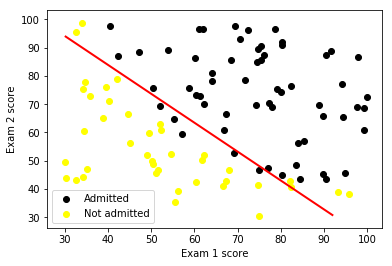

In [20]:
#Plloting decision boundry
axes = plt.gca()
axes.scatter(data[passedData][:, 0], data[passedData][:, 1], c = 'black', label = "Admitted")
axes.scatter(data[failedData][:, 0], data[failedData][:, 1], c = 'yellow', label = "Not admitted")
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(loc = 3)
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = expit(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=2, colors='r');
